# 15. Correlation

In [55]:
# Import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

sns.set_style('dark')
sns.set_palette('rocket')

## Cars - example (corr coef)

### Introduction

We'll explore the correlation between various attributes in a dataset of hybrid cars from 1997 to 2013. The data includes information on the model, year of manufacture, price, acceleration, fuel economy, and class of the car.

In [19]:
hybrid = pd.read_csv('hybrid.csv')
hybrid

,vehicle,year,msrp,acceleration,mpg,class
0,Prius (1st Gen),1997,24509.74,7.46,41.26,Compact
1,Tino,2000,35354.97,8.20,54.10,Compact
2,Prius (2nd Gen),2000,26832.25,7.97,45.23,Compact
3,Insight,2000,18936.41,9.52,53.00,Two Seater
4,Civic (1st Gen),2001,25833.38,7.04,47.04,Compact
...,...,...,...,...,...,...
148,S400,2013,92350.00,13.89,21.00,Large
149,Prius Plug-in,2013,32000.00,9.17,50.00,Midsize
150,C-Max Energi Plug-in,2013,32950.00,11.76,43.00,Midsize
151,Fusion Energi Plug-in,2013,38700.00,11.76,43.00,Midsize


### Scatter Plots
Let's visualize the relationships between the manufacturer's suggested retail price (msrp) and acceleration, as well as msrp and fuel economy (mpg).

Text(0.5, 1.0, 'acceleration vs. msrp')

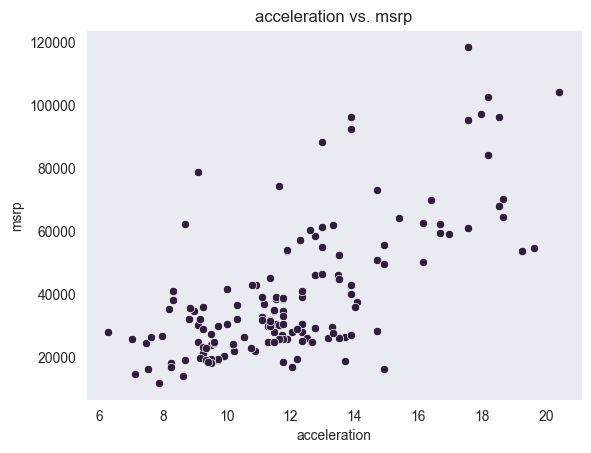

In [20]:
sns.scatterplot(x='acceleration', y='msrp', data=hybrid)
plt.title('acceleration vs. msrp')

Notice the positive association. The scatter of points is sloping upwards, indicating that cars with greater acceleration tended to cost more, on average; conversely, the cars that cost more tended to have greater acceleration on average.

The scatter diagram of MSRP versus mileage shows a negative association. Hybrid cars with higher mileage tended to cost less, on average. This seems surprising till you consider that cars that accelerate fast tend to be less fuel efficient and have lower mileage. As the previous scatter plot showed, those were also the cars that tended to cost more.

In [1]:
sns.scatterplot(x = 'mpg', y = 'msrp', data = hybrid)
plt.title('mpg vs. msrp')

NameError: name 'sns' is not defined

Along with the negative association, the scatter diagram of price versus efficiency shows a non-linear relation between the two variables. The points appear to be clustered around a curve, not around a straight line.

If we restrict the data just to the SUV class, however, the association between price and efficiency is still negative but the relation appears to be more linear. The relation between the price and acceleration of SUV’s also shows a linear trend, but with a positive slope.

<Axes: title={'center': 'acceleration vs. msrp - SUV'}, xlabel='acceleration', ylabel='msrp'>

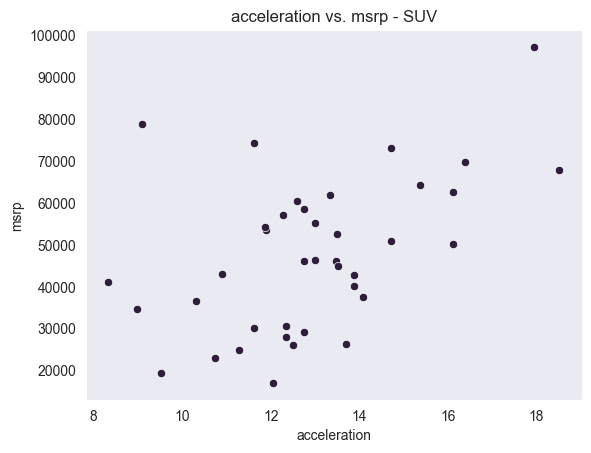

In [22]:
suv_subset = hybrid[hybrid['class'] == 'SUV']
plt.title('acceleration vs. msrp - SUV')
sns.scatterplot(x='acceleration', y='msrp', data=suv_subset, )

Text(0.5, 1.0, 'mpg vs. msrp - SUV')

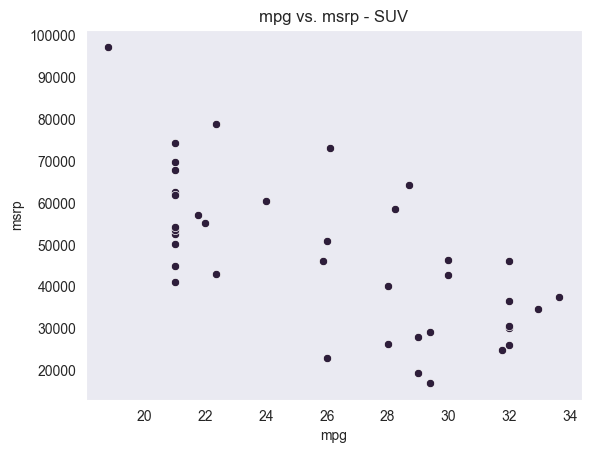

In [23]:
sns.scatterplot(x='mpg', y='msrp', data=suv_subset)
plt.title('mpg vs. msrp - SUV')

### Standard Units
We can compare different variables by converting them to standard units. This allows us to see the degree of linearity in scatter diagrams more clearly.

In [24]:
def standard_units(number):
    "Convert any array of numbers to standard units."
    return (number - np.mean(number))/np.std(number)

<Axes: title={'center': 'acceleration vs. msrp - SUV standardised'}, xlabel='acceleration strd', ylabel='msrp strd'>

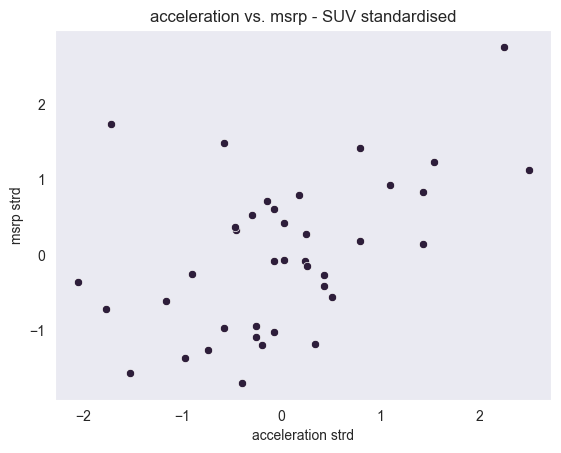

In [25]:
# Re-drawing the two scatter diagrams for SUVs, with all the variables measured in standard units.
suv_subset['acceleration strd'] = standard_units(suv_subset['acceleration'])
suv_subset['mpg strd'] = standard_units(suv_subset['mpg'])
suv_subset['msrp strd'] = standard_units(suv_subset['msrp'])

plt.title('acceleration vs. msrp - SUV standardised')
sns.scatterplot(x='acceleration strd', y='msrp strd', data=suv_subset)

Text(0.5, 1.0, 'mpg vs. msrp - SUV standardised')

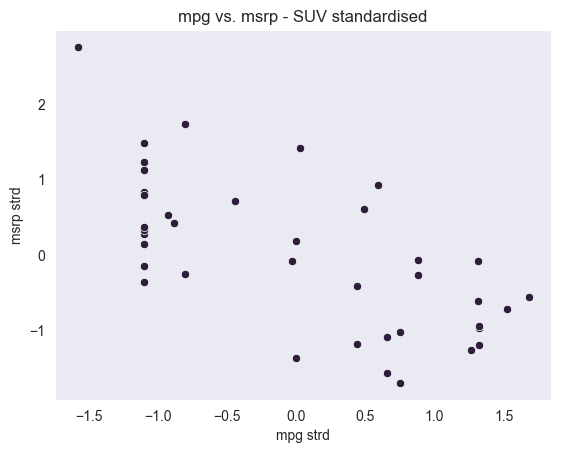

In [26]:
sns.scatterplot(x='mpg strd', y='msrp strd', data=suv_subset)
plt.title('mpg vs. msrp - SUV standardised')

### Correlation Coefficient
Now, let's calculate the correlation coefficient, a measure of the strength of the linear relationship between two variables.

**Steps for calculating R**

Step 1. Convert each variable to standard units.

Step 2. Multiply each pair of standard units.

Step 3. r is the average of the products computed in Step 2.

In Python use `.corr()`.


In [27]:
suv_subset[['acceleration', 'msrp']].corr().loc['acceleration', 'msrp']

0.4869979927995918

In [28]:
suv_subset[['mpg', 'msrp']].corr().loc['mpg', 'msrp']

-0.6667143635709922

These values confirm what we had observed:

There is a negative association between price and efficiency, whereas the association between price and acceleration is positive.

The linear relation between price and acceleration is a little weaker (correlation about 0.5) than between price and mileage (correlation about -0.67).

## Heights example (reg line)

In [29]:
heights = pd.read_csv('heights.csv')
heights.head()

,father,son
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3


<Axes: xlabel='father', ylabel='son'>

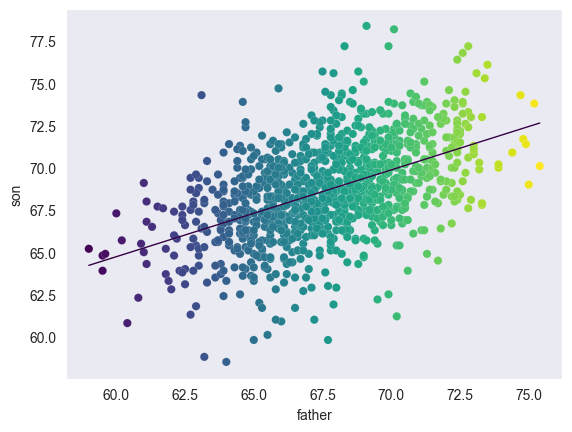

In [109]:
# Method 1
sns.scatterplot(data = heights,
    x = 'father',
    y = 'son',
    hue = 'father',
    legend = False,
    palette = 'viridis',
    linewidth=0.1,
    )
sns.regplot(data=heights, x='father', y='son',
    scatter = False, 
    ci = None,
    line_kws = {'color': '#340143', 'linewidth': 1})

## Shotput example - quadratic line

In [88]:
shotput = pd.read_csv('shotput.csv')

shotput = shotput.rename(columns = {'Weight Lifted': 'weight_lifted', 'Shot Put Distance': 'shotput_dist'})
shotput.head()

,weight_lifted,shotput_dist
0,37.5,6.4
1,51.5,10.2
2,61.3,12.4
3,61.3,13.0
4,63.6,13.2


<Axes: xlabel='weight_lifted', ylabel='shotput_dist'>

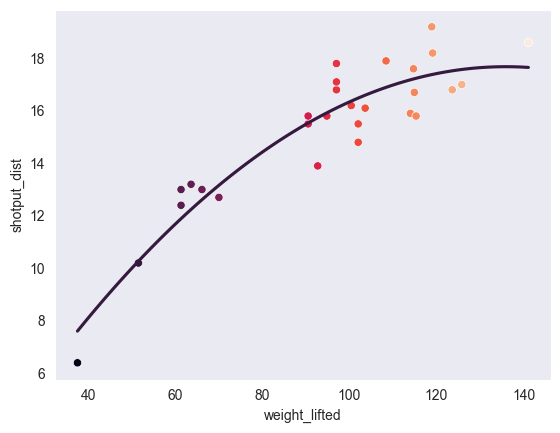

In [110]:
sns.scatterplot(data = shotput,
    x = 'weight_lifted',
    y = 'shotput_dist',
    hue = 'weight_lifted',
    palette = 'rocket',
    legend = False)

sns.regplot(data = shotput,
    x = 'weight_lifted',
    y = 'shotput_dist',
    ci = None,
    scatter = False,
    order = 2)

We could let order = 3, 4, 5, etc -> better capture the data -> but it gets more complex and hard to interpret.